In [ ]:
# Dependencies:
import numpy as np
import pandas as pd
import scipy.stats as stat
from matplotlib import pyplot as plt
from config import api_key
from pprint import pprint
import requests
import math


In [ ]:
# Data 
# global netflix data from netflix.com top 10 weekly shows
global_netflix_df = pd.read_csv("Resources/all-weeks-global.csv")
global_netflix_df.head()
global_netflix_df.dtypes

# Netflix Title data from kaggle.com- has title, info, imdb ratings, etc.
titles_netflix_df = pd.read_csv("Resources/titles.csv")
titles_netflix_df.head()
titles_netflix_df.dtypes

# Merge 
global_titles_df = pd.merge(global_netflix_df, titles_netflix_df, how= "left", left_on="show_title", right_on="title")
global_titles_df.drop(["title","tmdb_popularity","tmdb_score"], axis=1, inplace=True)
global_titles_df

In [ ]:
global_titles_df.to_csv("output_data/global_titles.csv")

In [ ]:
url = "http://www.omdbapi.com/?t="
api_key = "&apikey=b9b46bfd"

In [ ]:
# Changing all NAN values to NA in global_titles_df for easy referencing 
df = global_titles_df.fillna("NA")
df
# filtering data where imdb_score is NA and respective show title
df1 = df.loc[df["imdb_score"]=="NA","show_title"]
# Created the movie list with unique movie/show names
movies_list = df1.unique().tolist()
# Total number of unique movies/shows
len(movies_list)

In [ ]:
response = requests.get(url+"narco-saints"+api_key).json()
response

In [ ]:
# List that has unique movie/show names
movies_list
# Empty list to store fetched data from API
data = []
# API Key
api_key= "&apikey=b9b46bfd"
# looping through the movie list and fetching data for each movie
for movie in movies_list:
    try:
        response = requests.get(url+movie+api_key).json()
        # Appending data to the list
        data.append({"show_title":response["Title"],
                    "id" :response["imdbID"],"type":response["Type"],"description":response["Plot"],
                    "release_year":response["Year"],"age_certification":response["Rated"],"runtime":response["Runtime"],
                    "genres":response["Genre"],"production_countries":response["Country"],"imdb_id":response["imdbID"],
                    "imdb_score":response["imdbRating"],"imdb_votes":response["imdbVotes"]})
    except KeyError:
        pass
        
# Created the dataframe with all data fetched from api
#df3 = pd.DataFrame(data)
#df3


In [ ]:
df3 = pd.DataFrame(data)
df3
# Exporting data fetched from the API to csv file
df3.to_csv("output_data/api_data.csv")

In [ ]:
# merged the data fetched(df3) and dataframe we have(global_titles_df)
#changing all show titles into lower case 
global_titles_df["Show_title"]=global_titles_df['show_title'].str.lower()
df3["Show_title"]=df3['show_title'].str.lower()

merge_df = pd.merge(global_titles_df, df3, how= "left",on="Show_title")
# combining the data and storing it in separate column.(eg:combined type_x,type_y into one column type) and data cleaning
combined_df = merge_df.assign(type=merge_df.type_x.fillna(merge_df.type_y))
combined_df = combined_df.assign(description=merge_df.description_x.fillna(merge_df.description_y))
combined_df = combined_df.assign(release_year=merge_df.release_year_x.fillna(merge_df.release_year_y))
combined_df = combined_df.assign(age_certification=merge_df.age_certification_x.fillna(merge_df.age_certification_y))
combined_df = combined_df.assign(runtime=merge_df.runtime_x.fillna(merge_df.runtime_y))
combined_df = combined_df.assign(genres=merge_df.genres_x.fillna(merge_df.genres_y))
combined_df = combined_df.assign(production_countries=merge_df.production_countries_x.fillna(merge_df.production_countries_y))
combined_df = combined_df.assign(imdb_id=merge_df.imdb_id_x.fillna(merge_df.imdb_id_y))
combined_df = combined_df.assign(imdb_score=merge_df.imdb_score_x.fillna(merge_df.imdb_score_y))
combined_df = combined_df.assign(imdb_votes=merge_df.imdb_votes_x.fillna(merge_df.imdb_votes_y))
#dropping used columns
combined_df.drop(["show_title_x","show_title_y","id_x","id_y","type_x","type_y","description_x","description_y","release_year_x",
                "release_year_y","age_certification_x","age_certification_y","runtime_x","runtime_y","genres_x","genres_y",
                "production_countries_x","production_countries_y","imdb_id_x","imdb_id_y","imdb_score_x","imdb_score_y",
                "imdb_votes_x","imdb_votes_y","season_title","seasons"], axis=1, inplace=True)
#dropped all rows that has NAN values 
combined_df = combined_df.dropna()
# Dropped all rows that has imdb_score equal to N/A
cleaned_df = combined_df.loc[combined_df["imdb_score"]!="N/A"]
cleaned_df = combined_df.loc[combined_df["runtime"]!="N/A"]
cleaned_df = combined_df.loc[combined_df["age_certification"]!="N/A"]
#saving the dataframe into csv file
cleaned_df.to_csv("output_data/cleaned_netflix_data.csv")
print(cleaned_df.count())
cleaned_df

In [6]:
netflix_df = pd.read_csv("output_data/cleaned_netflix_data.csv")

netflix_df.head()


,Unnamed: 0,Unnamed: 0.1,week,category,weekly_rank,weekly_hours_viewed,cumulative_weeks_in_top_10,Show_title,type,description,release_year,age_certification,runtime,genres,production_countries,imdb_id,imdb_score,imdb_votes
0,0,0,2022-10-30,Films (English),1,68310000,1,the good nurse,movie,An infamous caregiver is implicated in the dea...,2022,R,121 min,"biography, crime, drama",United States,tt4273800,7.1,204
1,1,1,2022-10-30,Films (English),2,41950000,2,the school for good and evil,movie,Best friends Sophie and Agatha find themselves...,2022,PG-13,147 min,"action, comedy, drama",United States,tt2935622,5.8,"18,952"
2,2,2,2022-10-30,Films (English),3,9170000,2,the stranger,SHOW,A web of secrets sends family man Adam Price o...,2020,TV-MA,45.0,"thriller, crime, drama",['GB'],tt9698480,7.3,48298.0
3,3,3,2022-10-30,Films (English),4,8890000,1,wild is the wind,movie,An immigrant Nevada rancher brings a woman fro...,1957,Not Rated,114 min,drama,United States,tt0051193,6.7,"1,027"
4,4,4,2022-10-30,Films (English),5,8170000,3,the curse of bridge hollow,movie,"A teenage girl, who accidentally releases an a...",2022,TV-14,89 min,"adventure, comedy, family",United States,tt15289240,NaN,"4,085"


(1990, 2024)

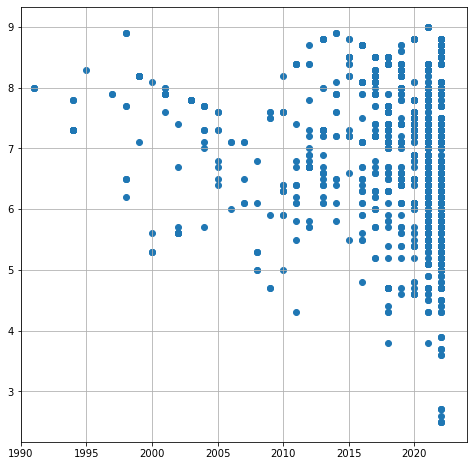

In [19]:
plt.figure(figsize=(8,8))
plt.scatter(netflix_df["release_year"],netflix_df["imdb_score"])
plt.grid()
plt.xlabel("")
plt.xlim(1990,2024)

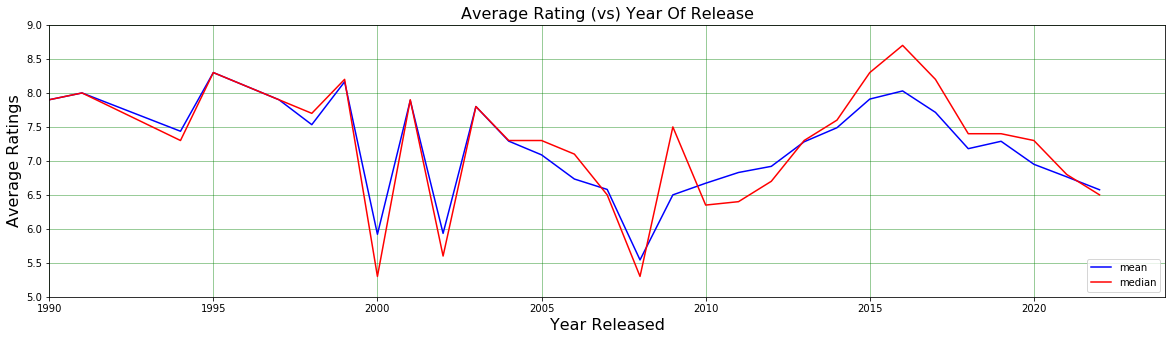

In [61]:
avg_ratings_per_year = netflix_df.groupby("release_year").mean()["imdb_score"]
median_ratings_per_year = netflix_df.groupby("release_year").median()["imdb_score"]
plt.figure(figsize=(20,5))
plt.plot(avg_ratings_per_year.index,avg_ratings_per_year.values,label="mean",color="blue")
plt.plot(median_ratings_per_year.index,median_ratings_per_year.values,label="median",color="red")
plt.legend(loc="lower right")
plt.xlabel("Year Released", fontsize=16)
plt.ylabel("Average Ratings", fontsize=16)
plt.title("Average Rating (vs) Year Of Release",fontsize=16)
plt.xlim(1990,2024)
plt.ylim(5,9)
plt.grid(color="green", alpha=.5)


In [81]:
groupedby_title = netflix_df.groupby("Show_title").agg({"weekly_rank":"min","cumulative_weeks_in_top_10":"max"}).reset_index()

rank_df = pd.merge(groupedby_title,netflix_df,how="inner",on=["Show_title","weekly_rank","cumulative_weeks_in_top_10"])
rank_df
rank_df.loc[rank_df["cumulative_weeks_in_top_10"]==4]


,Show_title,weekly_rank,cumulative_weeks_in_top_10,Unnamed: 0,Unnamed: 0.1,week,category,weekly_hours_viewed,type,description,release_year,age_certification,runtime,genres,production_countries,imdb_id,imdb_score,imdb_votes
232,the christmas chronicles,6,4,1310,1776,2021-12-26,Films (English),12910000,MOVIE,Siblings Kate and Teddy try to prove Santa Cla...,2018,PG,104.0,"comedy, family, fantasy",['US'],tt2990140,7.0,71740.0


Text(0, 0.5, 'Cumulative Weeks In Top 10')

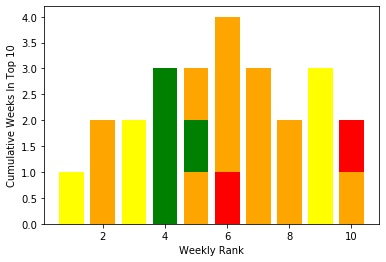

In [86]:
colors = ["Red","Orange","Orange","Yellow","Yellow","Green","Yellow","Orange","Yellow","Orange"]
#colors = ["Red","Orange","Yellow","Green","blue","purple","Indigo","pink","darkblue","violet"]
plt.bar(rank_df["weekly_rank"],rank_df["cumulative_weeks_in_top_10"],color=colors)
plt.xlabel("Weekly Rank")
plt.ylabel("Cumulative Weeks In Top 10")